# Analysis of COVID-19 data from South Korea

#### Information on COVID-19:
    
Coronavirus disease 2019 (COVID-19) is an infectious disease that was first discovered in Wuhan, China in December 2019, where the outbreak began. The most common syptoms are fever, tiredness and dry cough. About 80% of the infected recover without special treatment.
Around 1 out of every 6 people becomes seriously ill and develops difficulty breathing.
Older people, and those with underlying medical problems, are more likely to develop serious illness.
The disease can spread from person to person through small droplets from the nose or mouth.
The incubation period of the disease is commonly around five days, but ranges from 1-14 days.
Source: https://www.who.int/news-room/q-a-detail/q-a-coronaviruses (retrieved 2020-03-10)

Link for the dataset : (https://www.kaggle.com/kimjihoo/coronavirusdataset)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

#### Reading required Datasets

In [2]:
case = pd.read_csv("case.csv")
patient = pd.read_csv("patient.csv")
route = pd.read_csv("route.csv")
time = pd.read_csv("time.csv")
trend = pd.read_csv("trend.csv")

### 1. EDA

In [3]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1,Seoul,Guro-gu,True,Guro-gu Call Center,70,37.508163,126.884387
1,2,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
2,3,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
3,4,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006
4,5,Seoul,Dongdaemun-gu,True,Dongan Church,9,37.592888,127.056766


In [4]:
case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 8 columns):
case_id           78 non-null int64
province          78 non-null object
city              78 non-null object
group             78 non-null bool
infection_case    78 non-null object
confirmed         78 non-null int64
latitude          78 non-null object
longitude         78 non-null object
dtypes: bool(1), int64(2), object(5)
memory usage: 4.5+ KB


#### 1.1 Infection by group

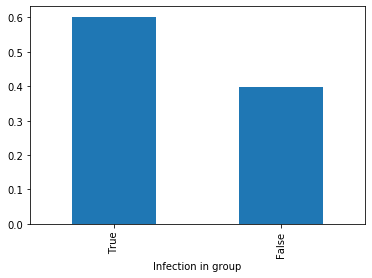

In [5]:
case['group'].value_counts(normalize=2).plot(kind='bar')
plt.xlabel('Infection in group')
plt.show()

Infection among the patients were mostly due to people travelling groups(60%)

#### 1.2 Infection by Province

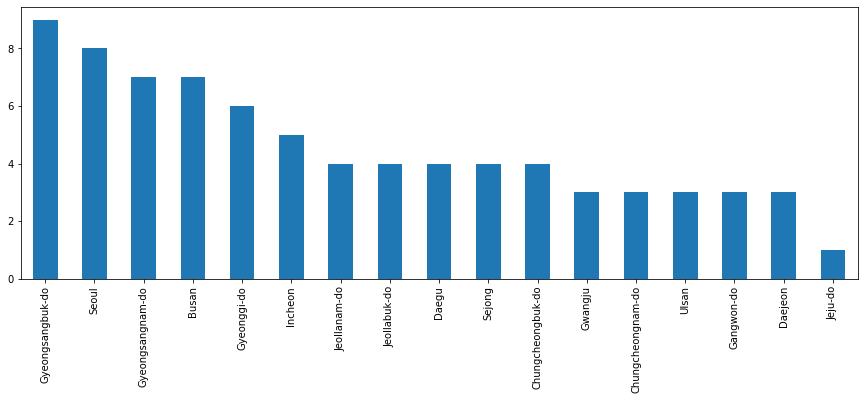

In [6]:
plt.figure(figsize=[15,5])
case['province'].value_counts().plot(kind='bar')
plt.show()

#### 1.3 Infection by city

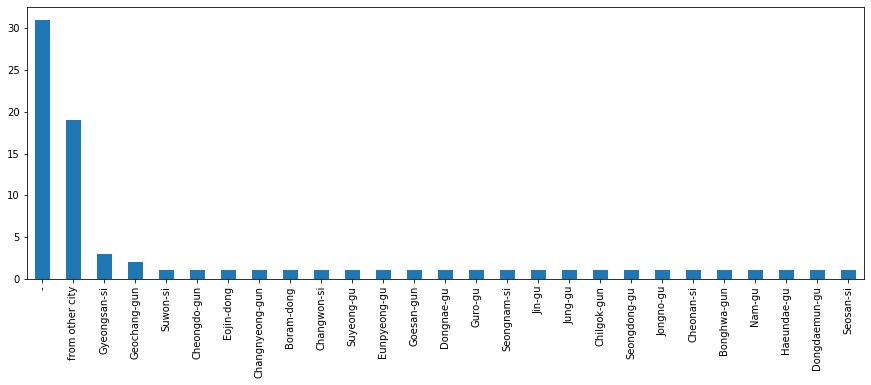

In [7]:
plt.figure(figsize=[15,5])
case['city'].value_counts().plot(kind='bar')
plt.show()

The graph shows there are many cases for which location hasnt been specified and there are also cases where the patients are from other cities.

#### 1.4 Causes of Infection

In [8]:
cause = case.groupby(['infection_case'])['confirmed'].sum().sort_values(ascending=False).reset_index()
cause

,infection_case,confirmed
0,Shincheonji Church,4757
1,etc,1566
2,contact with patient,705
3,Cheongdo Daenam Hospital,122
4,gym,113
5,Guro-gu Call Center,99
6,Bonghwa Pureun Nursing Home,56
7,Pilgrimage to Israel,49
8,Onchun Church,36
9,Milal Shelter,25


This dataset shows all the 30 reasons for the infection and the number of people infected due to it.

In [9]:
rel = ["Church"]
inst = ["Academy","Kindergarten","Center","Nursing","Ministry","Laboratory","Company"]
over = ["overseas","Pilgrimage"]
comm = ["APT","Shelter","Town","gym"]
others = ["etc","contact","Karaoke","myeon"]

In [10]:
j = None
reason = []
for i in cause['infection_case']:
    if "Hospital" in i:
        j = "Hospital"
        reason.append(j)
    for r in rel:
        if r in i:
            j = "religious"
            reason.append(j)
    for n in inst:
        if n in i:
            j = "institution"
            reason.append(j)
    for o in over:
        if o in i:
            j = "overseas"
            reason.append(j)
    for c in comm:
        if c in i:
            j = "community"
            reason.append(j)
    for s in others:
        if s in i:
            j = "others"
            reason.append(j)

cause['reason'] = reason

        reason  confirmed
0     Hospital        159
1    community        168
2  institution        231
3       others       2297
4     overseas         61
5    religious       4828
--------------------------------------------------


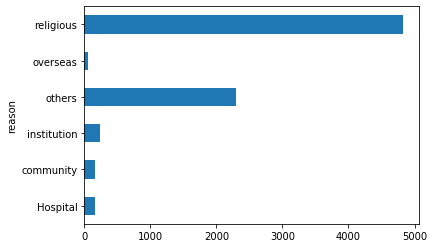

--------------------------------------------------


reason
Hospital        4
community       4
institution    10
others          5
overseas        2
religious       6
Name: confirmed, dtype: int64

In [11]:
res = cause.groupby('reason')['confirmed'].sum().reset_index()

print(res)

print('-'*50)

cause.groupby('reason')['confirmed'].sum().plot.barh()
plt.show()

print('-'*50)

cause.groupby('reason')['confirmed'].count()

#### We can observe from these interpretations that - 
1. Most Number of cases of infection is from places of religious influence.
2. Besides Shincheonji church, other 5 churches didnt have much number of infections.
3. Since the number of infections from churches are more it is one major place where future infection cases can arise.
4. Although the number of institutions where cases are reported is high, the number of infections is comparatively lower, i.e, 231.
5. The number of cases informed due to travel to overseas is also comparatively lower. But precautionary measures for traveling overseas is advised.
6. Athough community and hospital level spread is low, it is advised to take strict measures to prevent the infection.
7. The second major contributor to infection is the other means of spread, which includes smaller means of spread. Hence more information is required to study the smallest means for the virus to spread.

#### 1.5 Top 10 reasons of Infection

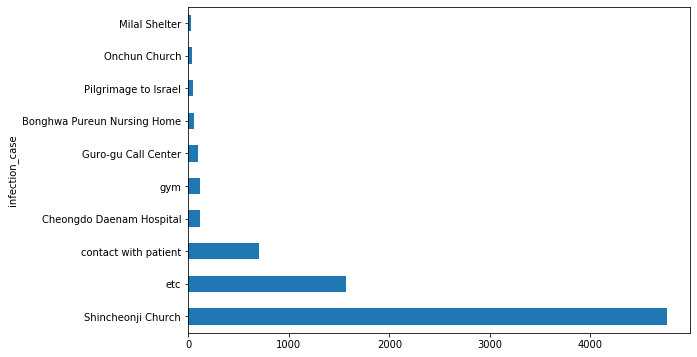

In [12]:
plt.figure(figsize=[9,6])
case.groupby('infection_case')['confirmed'].sum().sort_values(ascending=False)[:10].plot.barh()
plt.show()

Above is the top 10 causes of the infection cases. We can interpret from this graph that - 
1. Shincheonji Church had the most number of infected with more than 4500 cases.
2. Following it is the etc, which could mean various smaller means of viral spread.
3. Contact with patient is another major reason for the infection. This may have happened due to the lack of information on the virus or improper precautions taken to contain the infection.
4. Like the former, Cheongdo Daenam hospital also had a case of 122 infections due to the lack of information and failure in containing the infection.
5. The gym is also a major place where people come in every day. The major reason for the infection maybe due to no disinfection of the equipments.

### 2. MAP

In [13]:
SK = folium.Map(location=[35.87028, 128.59111],
                zoom_start=7,
                tiles="CartoDB dark_matter")

#### 2.1 Iterating empty values of latitude to nan values

In [14]:
zt = []
z = None
for i in case['latitude']:
    if i == '-':
        z = np.nan
        zt.append(z)
    else:
        z = i
        zt.append(z)
        
case['latitude'] = zt

In [15]:
zt1 = []
z1 = None
for i in case['longitude']:
    if i == '-':
        z1 = np.nan
        zt1.append(z1)
    else:
        z1 = i
        zt1.append(z1)
        
case['longitude'] = zt1

#### 2.2 Converting latitude and longitude to numeric values

In [16]:
case['latitude'] = pd.to_numeric(case['latitude'])
case['longitude'] = pd.to_numeric(case['longitude'])

In [17]:
# Function to replace empty latitude and longitude values
def long_lat(data, pr, val1, val2):
    longs = pd.DataFrame()
    longs = data[data['province']==pr].fillna({'latitude': val1, 'longitude': val2})
    return longs

#### 2.3 Replacing all the new values in new dataframes

In [18]:
seoul = long_lat(case, 'Seoul', 37.532600, 127.024612)
ulsan = long_lat(case, 'Ulsan', 35.53722, 129.31667)
sejong = long_lat(case, 'Sejong', 36.717332, 174.745747)
jeollanam_do = long_lat(case, 'Jeollanam-do', 35.01606, 126.71075)
jeollabuk_do = long_lat(case, 'Jeollabuk-do', 35.930082, 126.625602)
jeju_do = long_lat(case, 'Jeju-do', 33.489011, 126.498302)
incheon = long_lat(case, 'Incheon', 37.456257, 126.705208)
gyeongsangnam_do = long_lat(case, 'Gyeongsangnam-do', 34.855228, 128.429581)
gyeongsangbuk_do = long_lat(case, 'Gyeongsangbuk-do', 35.98466, 129.433918)
gyeonggi_do = long_lat(case, 'Gyeonggi-do', 37.764744, 126.787376)
gwangju = long_lat(case, 'Gwangju', 35.15472, 126.91556)
gangwon_do = long_lat(case, 'Gangwon-do', 37.734125,  128.587772)
daejeon = long_lat(case, 'Daejeon', 36.32139, 127.41972)
daegu = long_lat(case, 'Daegu', 35.87028, 128.59111)
chungcheongnam_do = long_lat(case, 'Chungcheongnam-do', 36.893611,  126.628328)
chungcheongbuk_do = long_lat(case, 'Chungcheongbuk-do', 37.000513,  127.499718)
busan = long_lat(case, 'Busan', 35.10278, 129.04028)

#### 2.4 Creating new dataframe

In [19]:
case1 = pd.concat([seoul, 
                   ulsan, 
                   sejong, 
                   jeollanam_do, 
                   jeollabuk_do, 
                   jeju_do, 
                   incheon, 
                   gyeongsangnam_do, 
                   gyeongsangbuk_do, 
                   gyeonggi_do, 
                   gwangju, 
                   daejeon, 
                   daegu, 
                   chungcheongnam_do, 
                   chungcheongbuk_do, 
                   busan], axis=0)

In [20]:
lenn1 = case1['longitude'].tolist()

In [21]:
for i in range(len(lenn1)):
    lat = case1['latitude'].iloc[i]
    long = case1['longitude'].iloc[i]
    radius = case1['confirmed'].iloc[i] / 45
    case = case1['infection_case'].iloc[i]
    
    if case1['confirmed'].iloc[i] > 100:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Province : {}<br>
                City : {}<br>
                Infection cases : {}<br>
                Cause : {}<br>"""
    popup_text = popup_text.format(case1['province'].iloc[i],
                                   case1['city'].iloc[i],
                                   case1['confirmed'].iloc[i],
                                   case1['infection_case'].iloc[i]
                                  )
    folium.CircleMarker(location = [lat, long], popup= popup_text, radius = radius, 
                        color = color, fill = True).add_to(SK)

### Map

In [22]:
SK

#### Observations -
1. We can see that there was a major outbreak at the Daegu and Gyeongsangbuk-do province. The major causes are the Shincheonji Church and etc.
2. The etc infection case was the major reason for the outbreak at many of the regions, although the city is not specified.
3. Popular places like Seoul, Incheon and Busan have more closely spaced cases of infection.
4. The island of jeju-do also had 4 cases of infection but only due to etc.